<a href="https://colab.research.google.com/github/ByteBoss-ai/Fraud-Detection/blob/main/CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
#Loading Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
)
from imblearn.over_sampling import SMOTE

***1. Exploring Dataset***

In [157]:
# 1. Loading Dataset
df = pd.read_csv("creditcard.csv")

In [158]:
#Check Dataset
print("No. of rows: ",df.shape[0]," No. of columns: ", df.shape[1])

No. of rows:  284807  No. of columns:  31


In [159]:
#Exploring the Dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [160]:
#Exploring the Dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [161]:
#Exploring the Dataset further
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [162]:
#Checking whether dataset has null/missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


No missing value

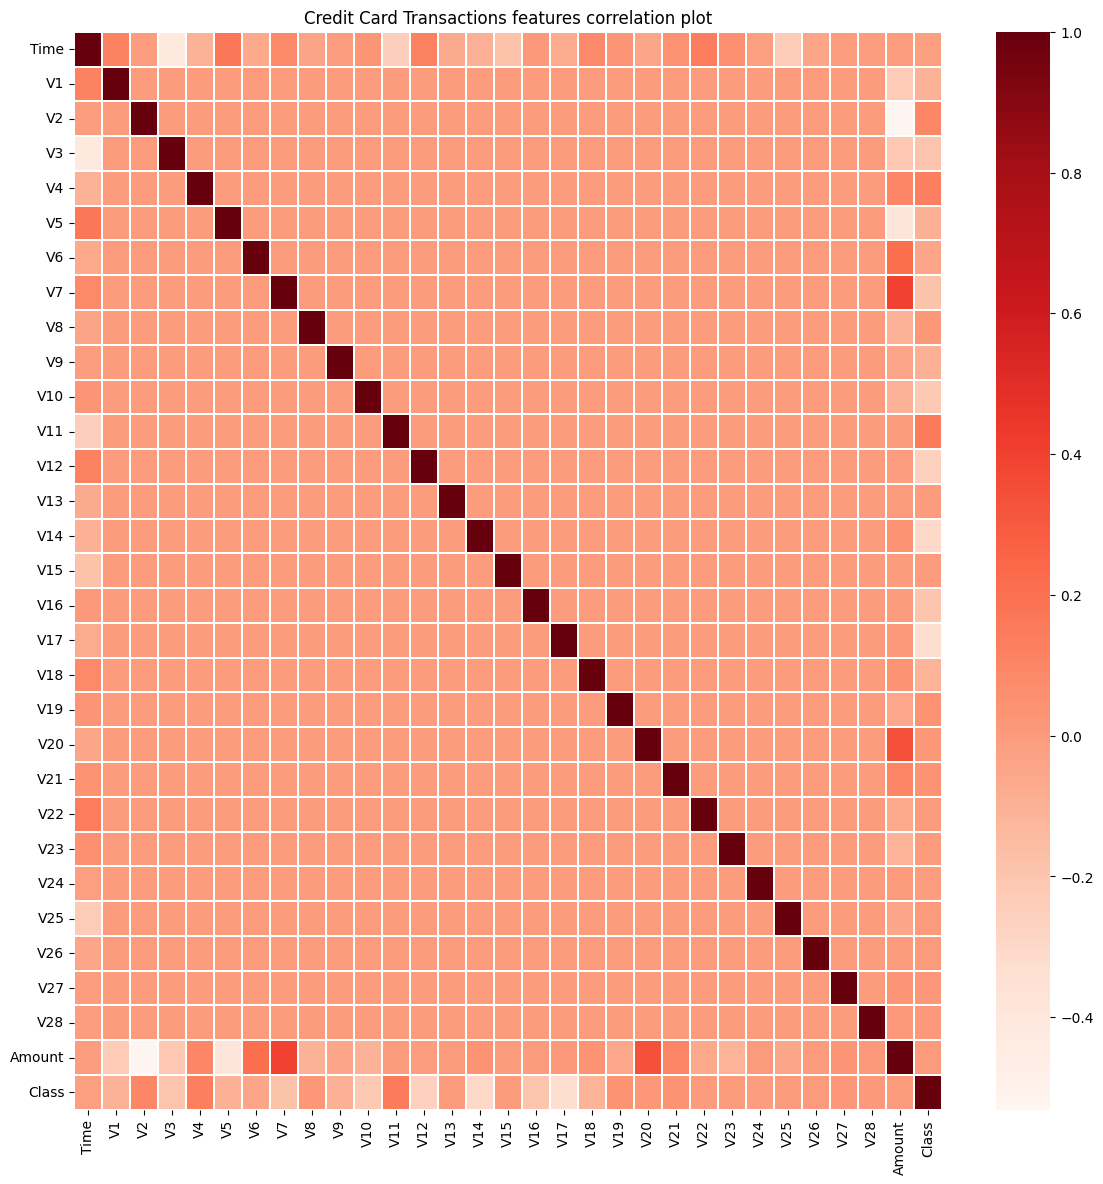

In [163]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

/tmp/ipython-input-1692636650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.index, y=corr_target.values, palette="Reds")


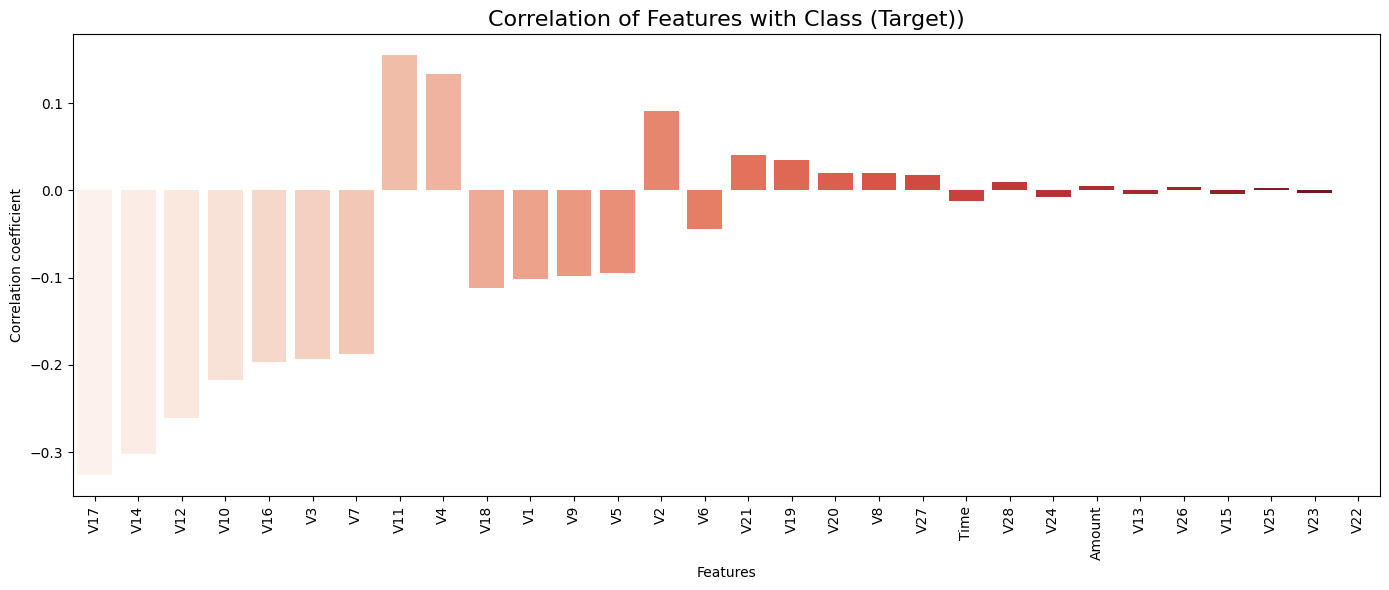

In [164]:
#Plotting
plt.figure(figsize=(14, 6))
plt.title("Correlation of Features with Class (Target))", fontsize=16)
corr_target = df.corr()["Class"].drop("Class")
corr_target = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)
sns.barplot(x=corr_target.index, y=corr_target.values, palette="Reds")
plt.xticks(rotation=90)
plt.ylabel("Correlation coefficient")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


***Data Preprocessing***

In [165]:
#Scaling features
scaler = StandardScaler()
df[["Amount", "Time"]] = scaler.fit_transform(df[["Amount", "Time"]])

Class Distribution:
 Class
0    283253
1       473
Name: count, dtype: int64


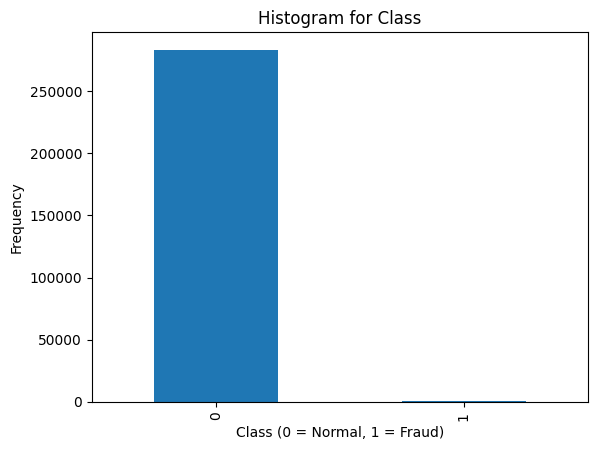

In [166]:
# Class distribution
data = df.copy()
data.drop_duplicates(inplace=True)

count_classes = data['Class'].value_counts()
print("Class Distribution:\n", count_classes)

count_classes.plot(kind='bar')
plt.title("Histogram for Class")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Frequency")
plt.show()

In [167]:
# Separate normal and fraud
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [168]:
# Downsample normal transactions
normal_downsample = normal.sample(n=len(fraud), random_state=42)
downsample_data = pd.concat([normal_downsample, fraud], ignore_index=True)
print("\nDownsampled Distribution:\n", downsample_data['Class'].value_counts())


Downsampled Distribution:
 Class
0    473
1    473
Name: count, dtype: int64


***3. Feature-Target Split***

In [169]:
#Feature and Target for downsampled data
X_down = downsample_data.drop('Class', axis=1)
y_down = downsample_data['Class']

In [170]:
# Check for NaNs in target
print(y.isna().sum())

# Drop rows where 'Class' is NaN
data = data.dropna(subset=['Class'])

0


In [171]:
#Feature and Target for Original data
X = data.drop('Class', axis=1)
y = data['Class']

In [172]:
# Apply SMOTE oversampling
X_over, y_over = SMOTE().fit_resample(X, y)
print("\nAfter SMOTE Oversampling:\n", y_over.value_counts())


After SMOTE Oversampling:
 Class
0    283253
1    283253
Name: count, dtype: int64


In [173]:
#Just Checking for NaN values in both Feature and Target Variables
print("NaNs in features:", X.isna().sum().sum())
print("NaNs in target:", y.isna().sum())

NaNs in features: 0
NaNs in target: 0


In [174]:
# Train-test splits
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(
    X_down, y_down, test_size=0.2, random_state=42
)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over, test_size=0.2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

***4. Models & Datasets***

In [175]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

datasets = {
    "Original": (X_train, y_train, X_test, y_test),
    "Downsampled": (X_train_down, y_train_down, X_test_down, y_test_down),
    "SMOTE Oversampled": (X_train_over, y_train_over, X_test_over, y_test_over)
}

***5. Training & Evaluation***

In [176]:
def evaluate_model(model_name, clf, X_train, y_train, X_test, y_test, dataset_name):
    # Fit the model on the training set
    clf.fit(X_train, y_train)

    # Predict labels on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

     # Print results in a clean format
    print(f"\n{model_name} ({dataset_name})")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Normal", "Fraud"],
                yticklabels=["Normal", "Fraud"])
    plt.title(f"Confusion Matrix - {model_name} ({dataset_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Decision Tree (Original)
Accuracy: 0.9989
Precision: 0.6471
Recall: 0.7333
F1 Score: 0.6875


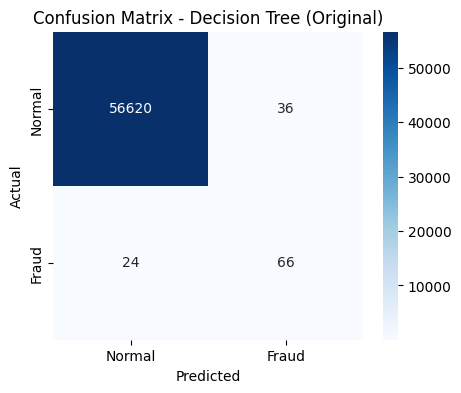


Decision Tree (Downsampled)
Accuracy: 0.8947
Precision: 0.9184
Recall: 0.8824
F1 Score: 0.9000


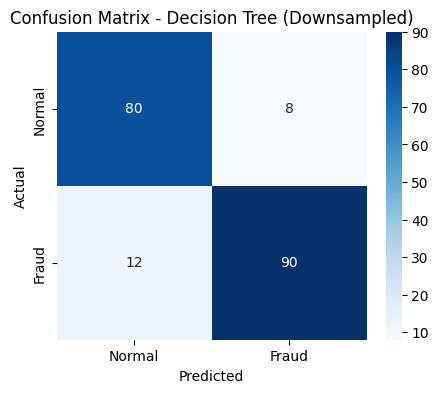


Decision Tree (SMOTE Oversampled)
Accuracy: 0.9981
Precision: 0.9972
Recall: 0.9989
F1 Score: 0.9981


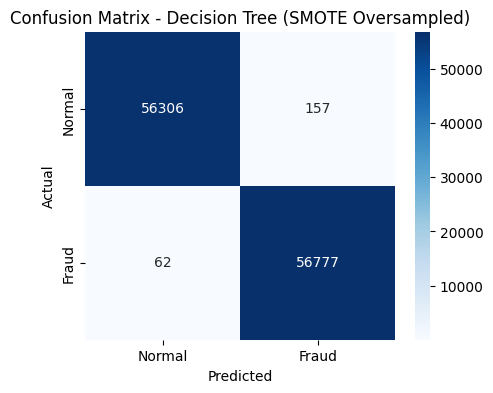

In [181]:
# Decision Tree
evaluate_model("Decision Tree", classifiers["Decision Tree"], X_train, y_train, X_test, y_test, "Original")
evaluate_model("Decision Tree", classifiers["Decision Tree"], X_train_down, y_train_down, X_test_down, y_test_down, "Downsampled")
evaluate_model("Decision Tree", classifiers["Decision Tree"], X_train_over, y_train_over, X_test_over, y_test_over, "SMOTE Oversampled")


Logistic Regression (Original)
Accuracy: 0.9992
Precision: 0.8947
Recall: 0.5667
F1 Score: 0.6939


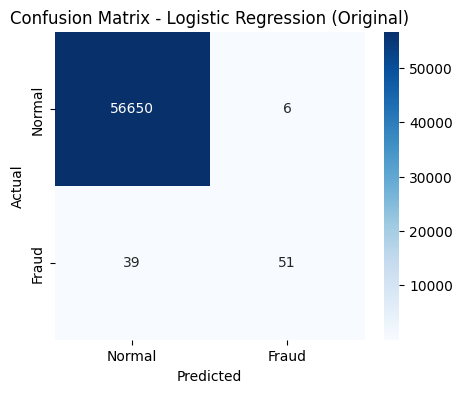


Logistic Regression (Downsampled)
Accuracy: 0.9316
Precision: 0.9588
Recall: 0.9118
F1 Score: 0.9347


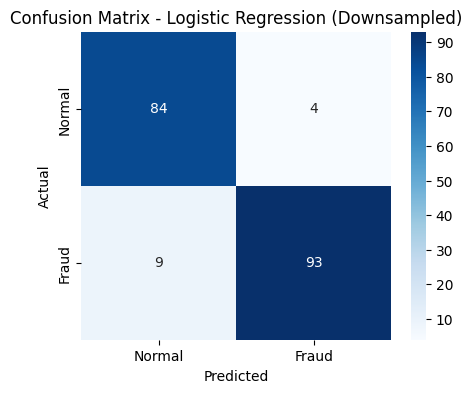


Logistic Regression (SMOTE Oversampled)
Accuracy: 0.9475
Precision: 0.9727
Recall: 0.9212
F1 Score: 0.9463


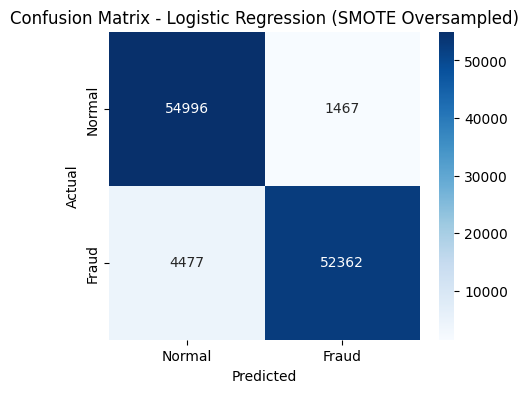

In [180]:
# Logistic Regression
evaluate_model("Logistic Regression", classifiers["Logistic Regression"], X_train, y_train, X_test, y_test, "Original")
evaluate_model("Logistic Regression", classifiers["Logistic Regression"], X_train_down, y_train_down, X_test_down, y_test_down, "Downsampled")
evaluate_model("Logistic Regression", classifiers["Logistic Regression"], X_train_over, y_train_over, X_test_over, y_test_over, "SMOTE Oversampled")


Random Forest (Original)
Accuracy: 0.9995
Precision: 0.9697
Recall: 0.7111
F1 Score: 0.8205


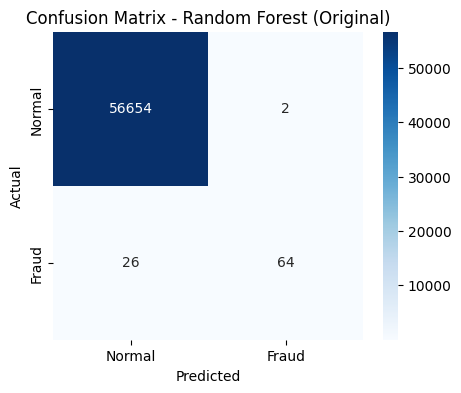


Random Forest (Downsampled)
Accuracy: 0.9368
Precision: 0.9891
Recall: 0.8922
F1 Score: 0.9381


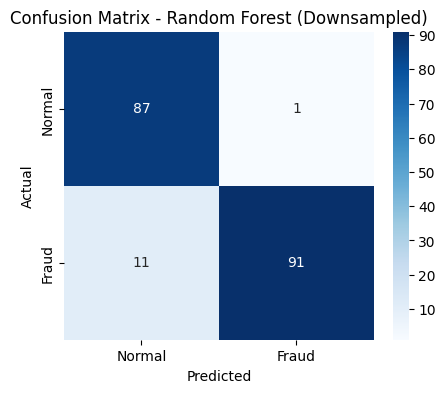


Random Forest (SMOTE Oversampled)
Accuracy: 0.9903
Precision: 0.9984
Recall: 0.9823
F1 Score: 0.9903


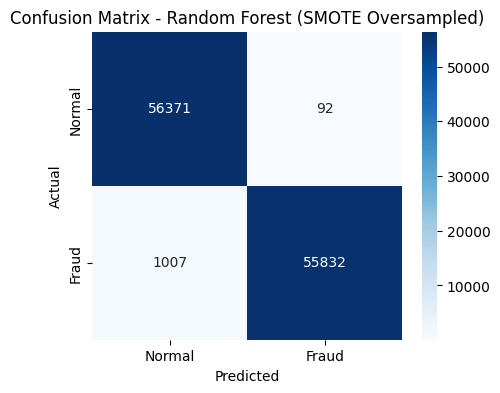

In [177]:
# Random Forest
evaluate_model("Random Forest", classifiers["Random Forest"], X_train, y_train, X_test, y_test, "Original")
evaluate_model("Random Forest", classifiers["Random Forest"], X_train_down, y_train_down, X_test_down, y_test_down, "Downsampled")
evaluate_model("Random Forest", classifiers["Random Forest"], X_train_over, y_train_over, X_test_over, y_test_over, "SMOTE Oversampled")